In [437]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot.pandas

# Import the API key
from config2 import api_key
from config2 import weather_api_key

In [438]:
#Create Dataframe with Zillow Indicator Data
zillow_indicators = pd.read_csv("Zillow Indicators.csv")
zillow_indicators.head()

,indicator_id,indicator,category
0,MRAM,"Mean Days to Pending (Raw, All Homes, Monthly)",Inventory and sales
1,SSSW,"Median Sale Price (Smooth, SFR only, Weekly View)",Inventory and sales
2,LSSM,"Median List Price (Smooth, SFR Only, Monthly)",Inventory and sales
3,CSAW,"Share of Listings With a Price Cut (Smooth, Al...",Inventory and sales
4,ISSM,"For-Sale Inventory (Smooth, SFR only, Monthly)",Inventory and sales


In [439]:
#Create Dataframe with Zillow Region Data
zillow_regions = pd.read_csv("Zillow Regions.csv")
zillow_regions.head()

,region_id,region_type,region
0,1286,county,Orange County;CA;Los Angeles-Long Beach-Anahei...
1,3175,county,Philadelphia County;PA;Philadelphia-Camden-Wil...
2,3017,county,Sacramento County;CA;Sacramento-Roseville-Fols...
3,401,county,"Bronx County;NY;New York-Newark-Jersey City, N..."
4,3165,county,Hillsborough County;FL;Tampa-St. Petersburg-Cl...


In [440]:
#Search regions Dataframe for Chicago
p = "Chicago"
chicago_regions = zillow_regions[zillow_regions['region'].str.contains(p)]
chicago_regions.head()

,region_id,region_type,region
425,10215,city,"Aurora;IL;Chicago-Naperville-Elgin, IL-IN-WI;K..."
607,41587,city,"Waukegan;IL;Chicago-Naperville-Elgin, IL-IN-WI..."
646,44597,city,"Cicero;IL;Chicago-Naperville-Elgin, IL-IN-WI;C..."
654,41460,city,"Valparaiso;IN;Chicago-Naperville-Elgin, IL-IN-..."
666,50764,city,"Arlington Heights;IL;Chicago-Naperville-Elgin,..."


In [441]:
#find all the region types
chicago_regions["region_type"].unique()

array(['city', 'county', 'neigh', 'zip', 'metro'], dtype=object)

In [442]:
#create the new dataframes
city_regions = chicago_regions.loc[chicago_regions["region_type"] == "city"]
county_regions = chicago_regions.loc[chicago_regions["region_type"] == "county"]
neigh_regions = chicago_regions.loc[chicago_regions["region_type"] == "neigh"]
zip_regions = chicago_regions.loc[chicago_regions["region_type"] == "zip"]
metro_regions = chicago_regions.loc[chicago_regions["region_type"] == "metro"]

City Dataframe Cleaning

In [443]:
city_regions.head()

,region_id,region_type,region
425,10215,city,"Aurora;IL;Chicago-Naperville-Elgin, IL-IN-WI;K..."
607,41587,city,"Waukegan;IL;Chicago-Naperville-Elgin, IL-IN-WI..."
646,44597,city,"Cicero;IL;Chicago-Naperville-Elgin, IL-IN-WI;C..."
654,41460,city,"Valparaiso;IN;Chicago-Naperville-Elgin, IL-IN-..."
666,50764,city,"Arlington Heights;IL;Chicago-Naperville-Elgin,..."


In [444]:
#clean the data by splitting region
split_region = city_regions['region'].str.split(';', n=4, expand=True)
split_region.columns = ['city', 'state', 'state_region', 'county']


In [445]:
# Concatenating the split columns with the original DataFrame
city_regions = pd.concat([city_regions, split_region], axis=1)

# Dropping the original 'region' column
city_regions.drop(columns=['region'], inplace=True)


In [446]:
city_regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 425 to 89052
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region_id     370 non-null    int64 
 1   region_type   370 non-null    object
 2   city          370 non-null    object
 3   state         370 non-null    object
 4   state_region  370 non-null    object
 5   county        370 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.2+ KB


In [447]:
city_regions.head()

,region_id,region_type,city,state,state_region,county
425,10215,city,Aurora,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Kane County
607,41587,city,Waukegan,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County
646,44597,city,Cicero,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County
654,41460,city,Valparaiso,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Porter County
666,50764,city,Arlington Heights,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County


County Dataframe Cleaning

In [448]:
county_regions.head()

,region_id,region_type,region
1453,139,county,"Cook County;IL;Chicago-Naperville-Elgin, IL-IN-WI"
6716,1682,county,"DuPage County;IL;Chicago-Naperville-Elgin, IL-..."
13058,220,county,"Lake County;IL;Chicago-Naperville-Elgin, IL-IN-WI"
14819,330,county,"Will County;IL;Chicago-Naperville-Elgin, IL-IN-WI"
18197,197,county,"Kane County;IL;Chicago-Naperville-Elgin, IL-IN-WI"


In [449]:
#clean the data by splitting region
split_region = county_regions['region'].str.split(';', n=3, expand=True)
split_region.columns = ['county', 'state', 'state_region']

In [450]:
# Concatenating the split columns with the original DataFrame
county_regions = pd.concat([county_regions, split_region], axis=1)

# Dropping the original 'region' column
county_regions.drop(columns=['region'], inplace=True)

In [451]:
#check that all columns are full
county_regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1453 to 36340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region_id     14 non-null     int64 
 1   region_type   14 non-null     object
 2   county        14 non-null     object
 3   state         14 non-null     object
 4   state_region  14 non-null     object
dtypes: int64(1), object(4)
memory usage: 672.0+ bytes


In [452]:
#check the dataframe
county_regions.head()

,region_id,region_type,county,state,state_region
1453,139,county,Cook County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
6716,1682,county,DuPage County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
13058,220,county,Lake County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
14819,330,county,Will County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
18197,197,county,Kane County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"


Neighborhood Dataframe Cleaning

In [453]:
#investigate data frame
neigh_regions.head()

,region_id,region_type,region
3705,403295,neigh,Lake View East; IL; Chicago-Naperville-Elgin; ...
5918,403288,neigh,Old Irving Park; IL; Chicago-Naperville-Elgin;...
7216,403286,neigh,Mayfair; IL; Chicago-Naperville-Elgin; Chicago...
7245,403271,neigh,North Mayfair; IL; Chicago-Naperville-Elgin; C...
8372,403306,neigh,Sheffield Neighbors; IL; Chicago-Naperville-El...


In [454]:
#split the "region" column
split_region = neigh_regions['region'].str.split(';', n=5, expand=True)
split_region.columns = ['neighborhood', 'state', 'state_region', 'city', 'county']

In [455]:
# Concatenating the split columns with the original DataFrame
neigh_regions = pd.concat([neigh_regions, split_region], axis=1)

# Dropping the original 'region' column
neigh_regions.drop(columns=['region'], inplace=True)

In [456]:
#check the dataframe
neigh_regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 3705 to 84483
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region_id     563 non-null    int64 
 1   region_type   563 non-null    object
 2   neighborhood  563 non-null    object
 3   state         563 non-null    object
 4   state_region  563 non-null    object
 5   city          563 non-null    object
 6   county        563 non-null    object
dtypes: int64(1), object(6)
memory usage: 35.2+ KB


In [457]:
#view the final dataframe
neigh_regions.head()

,region_id,region_type,neighborhood,state,state_region,city,county
3705,403295,neigh,Lake View East,IL,Chicago-Naperville-Elgin,Chicago,Cook County
5918,403288,neigh,Old Irving Park,IL,Chicago-Naperville-Elgin,Chicago,Cook County
7216,403286,neigh,Mayfair,IL,Chicago-Naperville-Elgin,Chicago,Cook County
7245,403271,neigh,North Mayfair,IL,Chicago-Naperville-Elgin,Chicago,Cook County
8372,403306,neigh,Sheffield Neighbors,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County


Zipcode Dataframe Cleaning

In [458]:
#investigate the dataframe
zip_regions.head()

,region_id,region_type,region
34764,78144,zip,46411; IN; Chicago-Naperville-Elgin; Whiting;L...
45696,84392,zip,60141; IL; Chicago-Naperville-Elgin; Broadview...
45776,84630,zip,"60629;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."
45797,84620,zip,"60618;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."
45805,84639,zip,"60639;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."


In [459]:
#split the "region" column
split_region = zip_regions['region'].str.split(';', n=5, expand=True)
split_region.columns = ['zipcode', 'state', 'state_region', 'city', 'county', 'blank']

In [460]:
# Concatenating the split columns with the original DataFrame
zip_regions = pd.concat([zip_regions, split_region], axis=1)

# Dropping the original 'region' column
zip_regions.drop(columns=['region'], inplace=True)
zip_regions.drop(columns=['blank'], inplace=True)

In [461]:
#view the final dataframe
zip_regions.head()

,region_id,region_type,zipcode,state,state_region,city,county
34764,78144,zip,46411,IN,Chicago-Naperville-Elgin,Whiting,Lake County
45696,84392,zip,60141,IL,Chicago-Naperville-Elgin,Broadview,Cook County
45776,84630,zip,60629,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
45797,84620,zip,60618,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
45805,84639,zip,60639,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County


In [462]:
#check that the county info is correct
zip_regions["county"].value_counts()

county
Cook County        164
Lake County         54
DuPage County       36
Will County         30
McHenry County      19
Kane County         19
DeKalb County       12
Kenosha County      10
Grundy County        8
Porter County        8
Kendall County       7
Newton County        6
Jasper County        5
 Kane County         3
 Kenosha County      2
 Cook County         1
 DeKalb County       1
 Kendall County      1
 DuPage County       1
 Newton County       1
 Porter County       1
Name: count, dtype: int64

Metro Region DataFrame Cleaning

In [463]:
#investigate metro region
metro_regions.head()

,region_id,region_type,region
89098,394463,metro,"Chicago, IL"


In [464]:
#clean data by splitting "region" column
split_region = metro_regions['region'].str.split(',', n=1, expand=True)
split_region.columns = ['city', 'state']

In [465]:
# Concatenating the split columns with the original DataFrame
metro_regions = pd.concat([metro_regions, split_region], axis=1)

# Dropping the original 'region' column
metro_regions.drop(columns=['region'], inplace=True)

In [466]:
#view dataframe
metro_regions

,region_id,region_type,city,state
89098,394463,metro,Chicago,IL


In [467]:
# Export categories_df and subcategories_df as CSV files.
metro_regions.to_csv("Resources/metro regions.csv", index=False)
zip_regions.to_csv("Resources/zip regions.csv", index=False)
neigh_regions.to_csv("Resources/neigh regions.csv", index=False)
city_regions.to_csv("Resources/city regions.csv", index=False)
county_regions.to_csv("Resources/county regions.csv", index=False)

Getting average home value in each city

In [468]:
zillow_data = pd.read_csv("Zillow Data.csv")
zillow_data.head()

,indicator_id,region_id,date,value
0,Z4BR,403211,2/28/2021,477466.00
1,ZALL,26591,11/30/2005,76985.30
2,ZALL,3986,11/30/2005,176636.58
3,ZALL,6626,11/30/2005,161867.52
4,ZALL,49285,11/30/2005,191388.10


In [469]:
zillow_data["date"]  = pd.to_datetime(zillow_data["date"])
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   indicator_id  1048575 non-null  object        
 1   region_id     1048575 non-null  int64         
 2   date          1048575 non-null  datetime64[ns]
 3   value         1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


In [470]:
zillow_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_id  56 non-null     object
 1   indicator     56 non-null     object
 2   category      56 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [471]:
home_values = zillow_indicators.loc[zillow_indicators["category"]=="Home values"]
home_values.head()

,indicator_id,indicator,category
39,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
40,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
41,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
42,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
43,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [472]:
indicators = home_values["indicator_id"].tolist()
indicators

['ZATT',
 'ZSFH',
 'ZALL',
 'ZCON',
 'ZABT',
 'Z5BR',
 'Z2BR',
 'Z3BR',
 'Z1BR',
 'Z4BR']

In [473]:
#find the average value per region_id
single_family_home_value = zillow_data.loc[zillow_data['indicator_id'].isin(indicators)]
single_family_home_value.head()

,indicator_id,region_id,date,value
0,Z4BR,403211,2021-02-28,477466.00
1,ZALL,26591,2005-11-30,76985.30
2,ZALL,3986,2005-11-30,176636.58
3,ZALL,6626,2005-11-30,161867.52
4,ZALL,49285,2005-11-30,191388.10


In [474]:
zillow_averages = single_family_home_value.groupby("region_id")["value"].mean()
zillow_averages.head()

region_id
66   226983.91
67   192588.70
68    97136.17
69    78122.97
70    83615.36
Name: value, dtype: float64

In [475]:
#combine to get the average value per city in one dataframe
city_values = pd.merge(city_regions,zillow_averages, on=["region_id"])
city_values.head()

,region_id,region_type,city,state,state_region,county,value
0,10215,city,Aurora,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Kane County,176352.21
1,41587,city,Waukegan,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,142347.59
2,44597,city,Cicero,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,174425.54
3,41460,city,Valparaiso,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Porter County,172825.14
4,50764,city,Arlington Heights,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,340394.87


In [476]:
#create CSV file with average home value
city_values.to_csv("Resources/average chicago area home value.csv", index=False)

In [477]:
#get rid of extra decimials in home value
pd.set_option('display.float_format', '{:.2f}'.format)

In [478]:
#find ten most expesnive chicago area cities
ten_most_expensive = city_values.nlargest(10, 'value')
ten_most_expensive

,region_id,region_type,city,state,state_region,county,value
255,46013,city,Kenilworth,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1626511.56
133,34876,city,Winnetka,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1459636.68
187,28578,city,Glencoe,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1162020.70
265,50850,city,Bannockburn,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,1037638.06
225,47750,city,South Barrington,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1025493.57
111,11926,city,Hinsdale,IL,"Chicago-Naperville-Elgin, IL-IN-WI",DuPage County,1007599.76
106,35491,city,Lake Forest,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,958459.41
167,16897,city,Barrington Hills,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,890568.47
308,31795,city,Golf,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,806011.96
213,26782,city,Riverwoods,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,763888.71


In [479]:
#find ten least expesnive chicago area cities
ten_least_expensive = city_values.nsmallest(10, 'value')
ten_least_expensive

,region_id,region_type,city,state,state_region,county,value
221,40587,city,Robbins,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,21396.96
8,45401,city,Gary,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,41873.28
71,28833,city,East Chicago,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,45175.51
222,37665,city,Burnham,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,46630.57
268,9566,city,Goodland,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Newton County,52921.31
149,25476,city,Lake Station,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,55007.73
292,52390,city,Hammond,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,58020.32
262,53525,city,New Chicago,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,58622.48
304,25758,city,Markham,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,60677.65
275,26480,city,Phoenix,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,64170.34


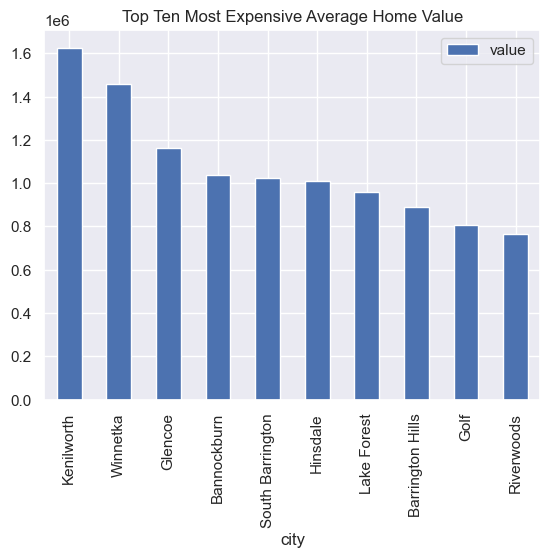

In [480]:
#plot
ten_most_expensive.plot(kind="bar", x="city", y="value", title="Top Ten Most Expensive Average Home Value")
plt.show()

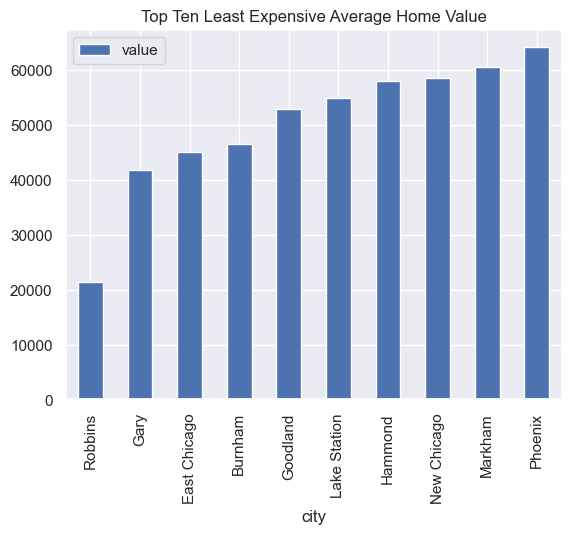

In [481]:
#plot
ten_least_expensive.plot(kind="bar", x="city", y="value", title="Top Ten Least Expensive Average Home Value")
plt.show()

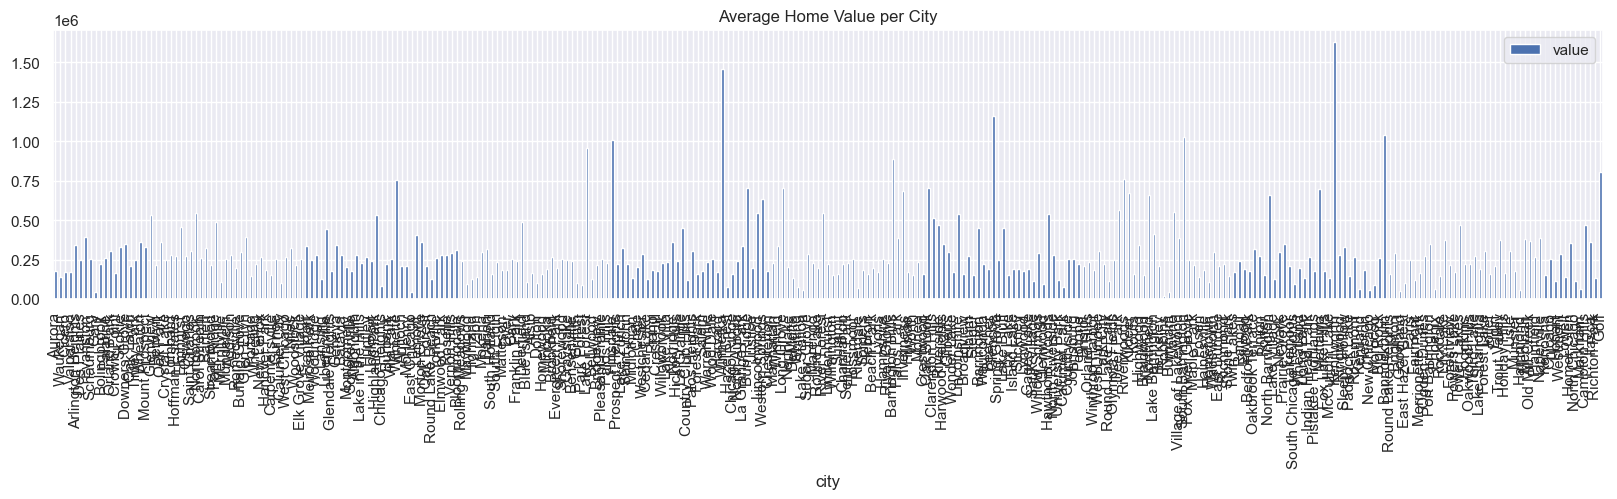

In [482]:
city_values.plot(kind="bar", x="city", y="value", title="Average Home Value per City", figsize=(20,3.5))
plt.show()

In [483]:
county_values = pd.merge(county_regions,zillow_averages, on=["region_id"])
county_values

,region_id,region_type,county,state,state_region,value
0,139,county,Cook County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",238146.84
1,1682,county,DuPage County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",313726.09
2,220,county,Lake County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",287413.29
3,330,county,Will County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",217739.84
4,197,county,Kane County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",211365.60
5,1922,county,McHenry County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",199917.32
6,1330,county,Porter County,IN,"Chicago-Naperville-Elgin, IL-IN-WI",191705.37
7,1837,county,Kenosha County,WI,"Chicago-Naperville-Elgin, IL-IN-WI",157373.40
8,1835,county,Kendall County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",213811.98
9,1657,county,DeKalb County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",145639.10


In [484]:
neigh_values = pd.merge(neigh_regions,zillow_averages, on=["region_id"])
neigh_values.head()

,region_id,region_type,neighborhood,state,state_region,city,county,value
0,403295,neigh,Lake View East,IL,Chicago-Naperville-Elgin,Chicago,Cook County,764876.00
1,403306,neigh,Sheffield Neighbors,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,1508634.00
2,403352,neigh,East Hyde Park,IL,Chicago-Naperville-Elgin,Chicago,Cook County,428171.00
3,269590,neigh,Lincoln Park,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,585498.03
4,403120,neigh,South Austin,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,245512.78


In [485]:
zip_values = pd.merge(zip_regions,zillow_averages, on=["region_id"])
zip_values.head()

,region_id,region_type,zipcode,state,state_region,city,county,value
0,84481,zip,60430,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Homewood,Cook County,123521.88
1,84413,zip,60164,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Northlake,Cook County,116681.31
2,84360,zip,60106,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Bensenville,DuPage County,164155.44
3,84547,zip,60513,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Brookfield,Cook County,158512.58
4,84694,zip,60805,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Evergreen Park,Cook County,114177.08
